In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv', parse_dates=["review_creation_date","review_answer_timestamp"])

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_comment_title     11715 non-null   object        
 4   review_comment_message   41753 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [7]:
reviews['year'] = reviews['review_answer_timestamp'].map(lambda x: x.date().year)
reviews['month'] = reviews['review_answer_timestamp'].map(lambda x: x.date().month)
reviews['day'] = 1

In [8]:
reviews["date"] = pd.to_datetime(reviews[["year", "month", "day"]])
reviews.set_index("date", inplace=True)
reviews.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [9]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
date,,,,,,,
2018-01-01,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
2018-03-01,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2018-02-01,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
2017-04-01,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
2018-03-01,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [10]:
reviews_monthly = reviews.resample("MS").agg(['mean', 'min', 'max'])

In [11]:
reviews_monthly

review_score        
                   mean min max
date                           
2016-10-01     4.138158   1   5
2016-11-01     3.196429   1   5
2016-12-01     2.283019   1   5
2017-01-01     4.398990   1   5
2017-02-01     4.278665   1   5
2017-03-01     4.011050   1   5
2017-04-01     4.035080   1   5
2017-05-01     4.075112   1   5
2017-06-01     4.098911   1   5
2017-07-01     4.163203   1   5
2017-08-01     4.211486   1   5
2017-09-01     4.180430   1   5
2017-10-01     4.169985   1   5
2017-11-01     4.094493   1   5
2017-12-01     3.928299   1   5
2018-01-01     4.024625   1   5
2018-02-01     3.989943   1   5
2018-03-01     3.752496   1   5
2018-04-01     3.867743   1   5
2018-05-01     4.181746   1   5
2018-06-01     4.167266   1   5
2018-07-01     4.273828   1   5
2018-08-01     4.194905   1   5
2018-09-01     4.310726   1   5
2018-10-01     3.944444   1   5

Text(0, 0.5, 'Review score')

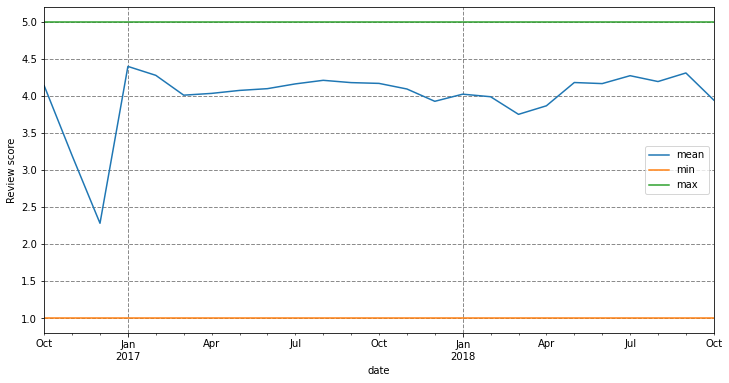

In [12]:
reviews_monthly.review_score.plot(figsize=(12, 6))
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Review score")


In [13]:
order_items = pd.read_csv('data/olist_order_items_dataset.csv', parse_dates=["shipping_limit_date"])

In [14]:
order_items["f_over_p"] = order_items.freight_value / order_items.price

In [15]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,f_over_p
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,0.225637
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,0.083076
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0.089799
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,0.984604
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,0.090745


In [16]:
order_items['year'] = order_items['shipping_limit_date'].map(lambda x: x.date().year)
order_items['month'] = order_items['shipping_limit_date'].map(lambda x: x.date().month)
order_items['day'] = 1

In [17]:
order_items["date"] = pd.to_datetime(order_items[["year", "month", "day"]])
order_items.set_index("date", inplace=True)
order_items.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [18]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,f_over_p
date,,,,,,,,
2017-09-01,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,0.225637
2017-05-01,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,0.083076
2018-01-01,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0.089799
2018-08-01,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,0.984604
2017-02-01,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,0.090745


In [19]:
order_items_monthly = order_items.resample("AS").agg(['mean', 'min', 'max'])

In [20]:
order_items_monthly

order_item_id                  price                 freight_value  \
                    mean  min   max        mean    min      max          mean   
date                                                                            
2016-01-01      1.264865  1.0   6.0  134.556541   6.00  1399.00     19.992676   
2017-01-01      1.197729  1.0  21.0  121.267328   1.20  6735.00     19.406014   
2018-01-01      1.197517  1.0  20.0  120.085157   0.85  6729.00     20.454316   
2019-01-01           NaN  NaN   NaN         NaN    NaN      NaN           NaN   
2020-01-01      1.250000  1.0   2.0   86.490000  69.99    99.99     38.060000   

                           f_over_p                       
              min     max      mean       min        max  
date                                                      
2016-01-01   0.48  169.12  0.298654  0.008013   2.351667  
2017-01-01   0.00  314.40  0.319018  0.000000  12.244444  
2018-01-01   0.00  409.68  0.322458  0.000000  26.235294  
2019-01-01    NaN     NaN       NaN       NaN        NaN  
2020-01-01  14.66   61.44  0.407957  0.193447   0.614461

In [21]:
orders = pd.read_csv('data/olist_orders_dataset.csv', parse_dates=["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"])

In [22]:
orders_delivered = orders[orders.order_status=="delivered"]

In [23]:
orders_delivered["stage_1"] = orders_delivered.order_approved_at - orders_delivered.order_purchase_timestamp

<ipython-input-23-ad51eae21359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered["stage_1"] = orders_delivered.order_approved_at - orders_delivered.order_purchase_timestamp


In [24]:
orders_delivered["stage_2"] = orders_delivered.order_delivered_carrier_date - orders_delivered.order_approved_at
orders_delivered["stage_3"] = orders_delivered.order_delivered_customer_date - orders_delivered.order_delivered_carrier_date

<ipython-input-24-a393aa12d526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered["stage_2"] = orders_delivered.order_delivered_carrier_date - orders_delivered.order_approved_at
<ipython-input-24-a393aa12d526>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered["stage_3"] = orders_delivered.order_delivered_customer_date - orders_delivered.order_delivered_carrier_date


In [25]:
orders_delivered["est_act"] = orders_delivered.order_estimated_delivery_date - orders_delivered.order_delivered_customer_date

<ipython-input-25-9669ba5a256e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered["est_act"] = orders_delivered.order_estimated_delivery_date - orders_delivered.order_delivered_customer_date


In [26]:
orders_delivered["wait_time"] = (orders_delivered.order_delivered_customer_date- orders_delivered.order_purchase_timestamp).dt.total_seconds()

<ipython-input-26-30bb33e0e91c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered["wait_time"] = (orders_delivered.order_delivered_customer_date- orders_delivered.order_purchase_timestamp).dt.total_seconds()


In [27]:
orders_delivered['year'] = orders_delivered['order_purchase_timestamp'].map(lambda x: x.date().year)
orders_delivered['month'] = orders_delivered['order_purchase_timestamp'].map(lambda x: x.date().month)
orders_delivered['day'] = orders_delivered['order_purchase_timestamp'].map(lambda x: x.date().day)
orders_delivered["date"] = pd.to_datetime(orders_delivered[["year", "month", "day"]])
orders_delivered.set_index("date", inplace=True)
orders_delivered.drop(['year', 'month', 'day'], axis=1, inplace=True)


<ipython-input-27-e244d0aa2072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered['year'] = orders_delivered['order_purchase_timestamp'].map(lambda x: x.date().year)
<ipython-input-27-e244d0aa2072>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered['month'] = orders_delivered['order_purchase_timestamp'].map(lambda x: x.date().month)
<ipython-input-27-e244d0aa2072>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [28]:
order_items_monthly = orders_delivered.wait_time.resample("AS").agg(['mean', 'min', 'max'])

In [29]:
order_items_monthly.head()

,mean,min,max
date,,,
2016-01-01,1.700059e+06,387477.0,6066456.0
2017-01-01,1.125406e+06,46087.0,18111912.0
2018-01-01,1.048697e+06,74600.0,18001592.0


<AxesSubplot:xlabel='date'>

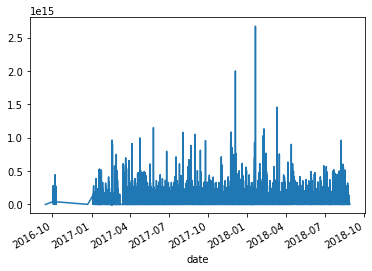

In [30]:
orders_delivered.stage_1.plot()

<AxesSubplot:xlabel='date'>

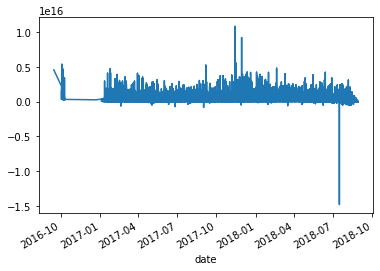

In [31]:
orders_delivered.stage_2.plot()

<AxesSubplot:xlabel='date'>

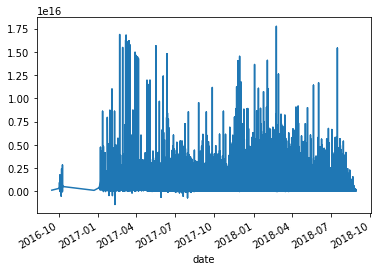

In [32]:
orders_delivered.stage_3.plot()

In [33]:
orders_delivered[orders_delivered.order_delivered_carrier_date < orders_delivered.order_approved_at]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,stage_1,stage_2,stage_3,est_act,wait_time
date,,,,,,,,,,,,,
2018-06-07,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,5 days 04:27:50,-2 days +15:22:58,10 days 00:40:32,12 days 08:25:28,1197080.0
2018-04-22,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15,2 days 09:37:09,-1 days +00:53:52,1 days 00:12:44,20 days 04:28:02,211425.0
2018-07-21,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31,5 days 10:42:21,-3 days +13:25:07,1 days 11:01:19,5 days 00:01:41,385727.0
2018-07-22,412fccb2b44a99b36714bca3fef8ad7b,c6865c523687cb3f235aa599afef1710,delivered,2018-07-22 22:30:05,2018-07-23 12:31:53,2018-07-23 12:24:00,2018-07-24 19:26:42,2018-07-31,0 days 14:01:48,-1 days +23:52:07,1 days 07:02:42,6 days 04:33:18,161797.0
2018-07-22,56a4ac10a4a8f2ba7693523bb439eede,78438ba6ace7d2cb023dbbc81b083562,delivered,2018-07-22 13:04:47,2018-07-27 23:31:09,2018-07-24 14:03:00,2018-07-28 00:05:39,2018-08-06,5 days 10:26:22,-4 days +14:31:51,3 days 10:02:39,8 days 23:54:21,471652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-02,240ead1a7284667e0ec71d01f80e4d5e,fcdd7556401aaa1c980f8b67a69f95dc,delivered,2018-07-02 16:30:02,2018-07-05 16:17:59,2018-07-05 14:11:00,2018-07-10 23:21:47,2018-07-24,2 days 23:47:57,-1 days +21:53:01,5 days 09:10:47,13 days 00:38:13,715905.0
2018-07-03,78008d03bd8ef7fcf1568728b316553c,043e3254e68daf7256bda1c9c03c2286,delivered,2018-07-03 13:11:13,2018-07-05 16:32:52,2018-07-03 12:57:00,2018-07-10 17:47:39,2018-07-23,2 days 03:21:39,-3 days +20:24:08,7 days 04:50:39,12 days 06:12:21,621386.0
2018-01-30,76a948cd55bf22799753720d4545dd2d,3f20a07b28aa252d0502fe7f7eb030a9,delivered,2018-01-30 02:41:30,2018-02-04 23:31:46,2018-01-31 18:11:58,2018-03-18 20:08:50,2018-03-02,5 days 20:50:16,-5 days +18:40:12,46 days 01:56:52,-17 days +03:51:10,4123640.0


In [34]:
orders_delivered[orders_delivered.order_delivered_customer_date < orders_delivered.order_delivered_carrier_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,stage_1,stage_2,stage_3,est_act,wait_time
date,,,,,,,,,,,,,
2017-07-20,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,0 days 19:22:22,7 days 10:14:44,-3 days +02:34:58,19 days 04:27:04,461524.0
2017-07-02,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,0 days 00:11:37,4 days 20:12:21,-2 days +21:05:10,14 days 09:32:09,322148.0
2017-07-16,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,1 days 17:28:16,2 days 13:18:12,-2 days +18:51:26,19 days 09:46:32,265074.0
2017-07-20,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,1 days 14:47:06,10 days 06:38:19,-7 days +23:45:40,15 days 05:50:50,508265.0
2017-07-18,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31,0 days 00:15:09,2 days 11:00:13,-1 days +19:48:59,10 days 05:07:19,198261.0
2016-10-08,8c78d01de3a9009e23d6877a7cc9be20,6cd7106899e59a1fbd0622d5f1efedf4,delivered,2016-10-08 15:36:50,2016-10-08 18:13:44,2016-10-26 11:41:53,2016-10-25 17:51:46,2016-11-30,0 days 02:36:54,17 days 17:28:09,-1 days +06:09:53,35 days 06:08:14,1476896.0
2017-06-14,b27af682321527a6349f1761eb3f360c,9859dd92e872dbaa60ca3cd5f0d7ad07,delivered,2017-06-14 20:17:04,2017-06-14 20:30:08,2017-06-27 14:51:54,2017-06-26 15:45:35,2017-07-14,0 days 00:13:04,12 days 18:21:46,-1 days +00:53:41,17 days 08:14:25,1020511.0
2017-08-07,1cc3ae63caffff2d6c3ee3e78e074acf,01c843a2c0600def0b7693dba47af460,delivered,2017-08-07 21:35:22,2017-08-08 21:45:15,2017-08-10 18:28:56,2017-08-10 18:05:38,2017-08-25,1 days 00:09:53,1 days 20:43:41,-1 days +23:36:42,14 days 05:54:22,246616.0
2017-07-26,e37f11cae9985ca58f0b56f268720537,3947a361301f2ff0f3223159a0f2701c,delivered,2017-07-26 11:46:34,2017-07-27 10:10:16,2017-08-01 18:17:47,2017-07-31 17:49:56,2017-08-24,0 days 22:23:42,5 days 08:07:31,-2 days +23:32:09,23 days 06:10:04,453802.0


<AxesSubplot:xlabel='date'>

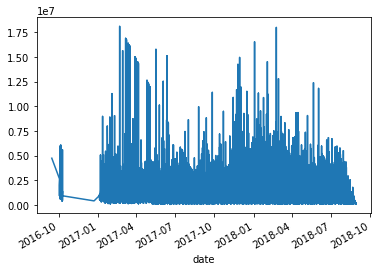

In [35]:
orders_delivered.wait_time.plot()

In [36]:
orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,stage_1,stage_2,stage_3,est_act,wait_time
date,,,,,,,,,,,,,
2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,7 days 02:34:47,728920.0
2018-07-24,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45,5 days 08:32:15,1190768.0
2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,9 days 04:16:29,17 days 05:53:31,811660.0
2017-11-18,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,12 days 23:31:18,1141236.0
2018-02-13,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28,9 days 05:42:58,248303.0


In [37]:
order_items[order_items.order_id=="a1abeb653a4d4cd1e142ccb8c82cd069"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,f_over_p
date,,,,,,,,
2017-08-01,a1abeb653a4d4cd1e142ccb8c82cd069,1,b9311d581f5f341576a5a2892168355c,ec4608a1f76453166bb312b2968aeaf4,2017-08-01 06:43:14,29.90,0.08,0.002676
2017-08-01,a1abeb653a4d4cd1e142ccb8c82cd069,2,b114bf337c0626166abe574eee9e3f32,7c67e1448b00f6e969d365cea6b010ab,2017-08-01 06:43:14,169.94,74.65,0.439273
2017-08-01,a1abeb653a4d4cd1e142ccb8c82cd069,3,b9311d581f5f341576a5a2892168355c,ec4608a1f76453166bb312b2968aeaf4,2017-08-01 06:43:14,29.90,0.08,0.002676


In [38]:
order_items[order_items.order_id=="383aa8b2724fe452d9ccd9934a8c628b"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,f_over_p
date,,,,,,,,
2017-07-01,383aa8b2724fe452d9ccd9934a8c628b,1,09ffd5e043f6d44ca166be7f91dab462,31344c16881c08a8a72c6d2eb29918c1,2017-07-06 21:10:20,39.9,2.49,0.062406
2017-07-01,383aa8b2724fe452d9ccd9934a8c628b,2,eff955ba97941dc6837a770367d66944,1554a68530182680ad5c8b042c3ab563,2017-07-06 21:10:20,43.9,24.95,0.568337


In [39]:
order_ids = orders_delivered[orders_delivered.order_delivered_customer_date < orders_delivered.order_delivered_carrier_date].order_id

In [40]:
order_items[np.isin(order_items.order_id, order_ids)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,f_over_p
date,,,,,,,,
2017-07-01,0922ee1619de7b995648e5a8407afb91,1,4689718bc1b839a9baeaa91d2c278598,259f7b5e6e482c230e5bfaa670b6bb8f,2017-07-17 10:55:15,139.90,38.30,0.273767
2017-07-01,0922ee1619de7b995648e5a8407afb91,2,30caacf4dfc199dc577a9627395a881d,f80edd2c5aaa505cc4b0a3b219abf4b8,2017-07-17 10:55:15,64.90,5.99,0.092296
2016-10-01,19feb5627c41ea1b36a8e50a469b3644,1,4c72e6d081c8a1b5430351d015eb86ba,391fc6631aebcf3004804e51b40bcf1e,2016-10-11 17:32:10,193.80,18.52,0.095562
2017-08-01,1cc3ae63caffff2d6c3ee3e78e074acf,1,67682f5c5170c72b398941e2193735a4,f615fe7efbef0f4f08fd3086bc7a3e60,2017-08-14 21:45:15,39.90,9.22,0.231078
2017-08-01,1cc3ae63caffff2d6c3ee3e78e074acf,2,dc881ef926ca402063ea142afc83874c,7aa4334be125fcdd2ba64b3180029f14,2017-08-14 21:45:15,87.99,14.35,0.163087
2017-06-01,29941903985f944b0ffc49c479c1547d,1,3006b8f5b476750a03137c1b2755cea1,06e5eefc71ec47ae763c5c6f8db7064f,2017-06-02 16:25:16,169.99,7.70,0.045297
2017-06-01,29941903985f944b0ffc49c479c1547d,2,6ab41d7f15e7af9d6c7cd912055acc1a,218d46b86c1881d022bce9c68a7d4b15,2017-06-02 16:25:16,119.99,23.11,0.192599
2017-07-01,383aa8b2724fe452d9ccd9934a8c628b,1,09ffd5e043f6d44ca166be7f91dab462,31344c16881c08a8a72c6d2eb29918c1,2017-07-06 21:10:20,39.90,2.49,0.062406
2017-07-01,383aa8b2724fe452d9ccd9934a8c628b,2,eff955ba97941dc6837a770367d66944,1554a68530182680ad5c8b042c3ab563,2017-07-06 21:10:20,43.90,24.95,0.568337


In [41]:
order_items[order_items.seller_id=="259f7b5e6e482c230e5bfaa670b6bb8f"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,f_over_p
date,,,,,,,,
2017-11-01,028f5779c98e7df5dc803824bdaae40b,1,3fa43718c1d128c8d2f148530e9493f5,259f7b5e6e482c230e5bfaa670b6bb8f,2017-11-08 03:31:17,74.9,25.04,0.334312
2018-03-01,035c06c36cc8685238297b6af0c280f3,1,71d22271ee986bf5a46a2c199da0265b,259f7b5e6e482c230e5bfaa670b6bb8f,2018-03-29 02:55:37,39.9,11.15,0.279449
2017-11-01,049ad2bf8710b108e943f5074aed4939,1,96b0a882d11b17ce51238420ec63e3a1,259f7b5e6e482c230e5bfaa670b6bb8f,2017-11-16 03:07:26,54.9,13.08,0.238251
2018-04-01,0560690f57123e9331f5731479b2d505,1,8e8d71f2bb02bf4ebb57a8017789f98d,259f7b5e6e482c230e5bfaa670b6bb8f,2018-04-19 10:35:17,139.9,13.88,0.099214
2017-07-01,0922ee1619de7b995648e5a8407afb91,1,4689718bc1b839a9baeaa91d2c278598,259f7b5e6e482c230e5bfaa670b6bb8f,2017-07-17 10:55:15,139.9,38.30,0.273767
...,...,...,...,...,...,...,...,...
2018-02-01,edc7444663af179dd113423c0512b4e4,1,c045b19fdb30a3035c56d04c6fe2e622,259f7b5e6e482c230e5bfaa670b6bb8f,2018-02-15 18:48:02,54.9,13.08,0.238251
2018-08-01,f27cc61c27c26b63dd0b279bb9c29ed6,1,981f6a96c09b7d28e5c5f2fbb282fcde,259f7b5e6e482c230e5bfaa670b6bb8f,2018-08-29 14:10:32,57.9,11.43,0.197409
2017-09-01,f32c4d2b078bc5a354f4c1184522b5ff,1,0f789be671fe3bd93cabfbb4a710f282,259f7b5e6e482c230e5bfaa670b6bb8f,2017-09-22 13:15:08,29.9,9.34,0.312375


In [42]:
orders_orig = pd.read_csv('data/olist_orders_dataset.csv', parse_dates=["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"])

In [43]:
orders_orig.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [44]:
order_items_orig = pd.read_csv('data/olist_order_items_dataset.csv', parse_dates=["shipping_limit_date"])

In [45]:
order_items_orig.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [46]:
merged = pd.merge(left=orders_orig, right=order_items_orig, left_on='order_id', right_on='order_id')

In [47]:
order_purchase_ts = merged.groupby("seller_id").order_purchase_timestamp.agg(["min", "max"])

In [48]:
from datetime import datetime

begin_ts = merged.groupby("seller_id").order_purchase_timestamp.agg(["min", "max"]).min(axis=1).min(axis=0).floor("D")
end_ts = merged.groupby("seller_id").order_purchase_timestamp.agg(["min", "max"]).max(axis=1).max(axis=0).ceil("D")

In [49]:
result = []
for elem in pd.date_range(begin_ts, end_ts):
    result.append([elem, order_purchase_ts[(order_purchase_ts["min"] < elem) & (elem < order_purchase_ts["max"])].size])
df = pd.DataFrame(result, columns=["Date", "Count"])
df.set_index("Date", inplace=True)

<AxesSubplot:xlabel='Date'>

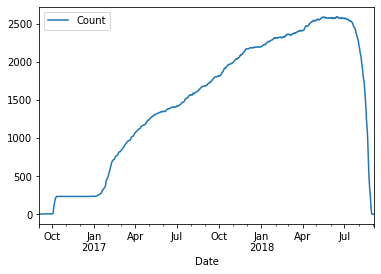

In [50]:
df.plot()

In [51]:
order_purchase_ts["start_date"] = order_purchase_ts["min"].apply(lambda x: x.floor("D"))

In [52]:
result = []
for elem in pd.date_range(begin_ts, end_ts):
    result.append([elem, order_purchase_ts[(order_purchase_ts["start_date"] == elem)].size])
df_growth = pd.DataFrame(result, columns=["Date", "Count"])
df_growth.set_index("Date", inplace=True)

<AxesSubplot:xlabel='Date'>

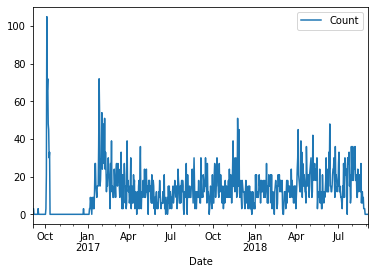

In [53]:
df_growth.plot()

In [54]:
merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [55]:
merged["purchase_year"] = merged['order_purchase_timestamp'].map(lambda x: x.date().year)
merged["purchase_month"]= merged['order_purchase_timestamp'].map(lambda x: x.date().month)
merged["purchase_day"]= merged['order_purchase_timestamp'].map(lambda x: x.date().day)



In [56]:
merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,purchase_year,purchase_month,purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017,10,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018,7,24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018,8,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017,11,18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018,2,13


In [57]:
merged.groupby(["purchase_year", "purchase_month", "purchase_day", "seller_id"]).order_id.agg("count")

purchase_year  purchase_month  purchase_day  seller_id                       
2016           9               4             1554a68530182680ad5c8b042c3ab563    2
                               5             a425f92c199eb576938df686728acd20    1
                               15            ecccfa2bb93b34a3bf033cc5d1dcdc69    3
               10              2             25e6ffe976bd75618accfe16cefcbd0d    1
                               3             45d33f715e24d15a6ccf5c17b3a23e3c    1
                                                                                ..
2018           8               29            7d7866a99a8656a42c7ff6352a433410    1
                                             9f505651f4a6abe901a56cdc21508025    1
                                             c70c1b0d8ca86052f45a432a38b73958    5
                                             fa1c13f2614d7b5c4749cbc52fecda94    1
               9               3             25be943a321c8938947bdaabca979a90    1
Name: ord

In [58]:
merged["purchase_date"] = merged["order_purchase_timestamp"].apply(lambda x: x.floor("D"))

In [59]:
merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,purchase_year,purchase_month,purchase_day,purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017,10,2,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018,7,24,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018,8,8,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017,11,18,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018,2,13,2018-02-13


In [60]:
result = []
for elem in pd.date_range(begin_ts, end_ts):
    filtered = merged[merged.purchase_date == elem]
    gini_coeff = gini(filtered.groupby("seller_id").order_id.agg("count"))
    if not np.isnan(gini_coeff):
        result.append([elem, gini_coeff])
    else:
        result.append([elem, 0])
df_gini = pd.DataFrame(result, columns=["Date", "Gini"])
df_gini.set_index("Date", inplace=True)

NameError: name 'gini' is not defined

In [61]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [62]:
df_gini.plot()

NameError: name 'df_gini' is not defined

In [63]:
merged[merged.order_delivered_customer_date < merged.order_delivered_carrier_date ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,purchase_year,purchase_month,purchase_day,purchase_date
7242,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,1,b9311d581f5f341576a5a2892168355c,ec4608a1f76453166bb312b2968aeaf4,2017-08-01 06:43:14,29.90,0.08,2017,7,20,2017-07-20
7243,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,2,b114bf337c0626166abe574eee9e3f32,7c67e1448b00f6e969d365cea6b010ab,2017-08-01 06:43:14,169.94,74.65,2017,7,20,2017-07-20
7244,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,3,b9311d581f5f341576a5a2892168355c,ec4608a1f76453166bb312b2968aeaf4,2017-08-01 06:43:14,29.90,0.08,2017,7,20,2017-07-20
10744,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,1,09ffd5e043f6d44ca166be7f91dab462,31344c16881c08a8a72c6d2eb29918c1,2017-07-06 21:10:20,39.90,2.49,2017,7,2,2017-07-02
10745,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,2,eff955ba97941dc6837a770367d66944,1554a68530182680ad5c8b042c3ab563,2017-07-06 21:10:20,43.90,24.95,2017,7,2,2017-07-02
15184,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,1,dae7d137a7eb1a685e48c83f7952b388,30a2f535bb48308f991d0b9ad4a8c4bb,2017-07-24 06:03:50,49.90,10.40,2017,7,16,2017-07-16
15185,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,2,77b61edc47d5dda4e6fb3568962d3e63,066a6914e1ebf3ea95a216c73a986b91,2017-07-24 06:03:50,74.90,4.86,2017,7,16,2017-07-16
16302,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,1,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2017-07-27 11:45:11,119.90,23.42,2017,7,20,2017-07-20
16303,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,2,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2017-07-27 11:45:11,119.90,23.42,2017,7,20,2017-07-20
16304,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,3,42155695adbe665066ad812855fe523a,e9d99831abad74458942f21e16f33f92,2017-07-27 11:45:11,38.99,4.44,2017,7,20,2017-07-20


In [64]:
products = pd.read_csv("data/olist_products_dataset.csv")

In [65]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [66]:
merged_products = pd.merge(left=merged, right=products, left_on='product_id', right_on='product_id')

In [67]:
merged_products[merged_products.order_delivered_customer_date < merged_products.order_delivered_carrier_date].seller_id

6541      36a968b544695394e4e9d7572688598f
8170      e5a38146df062edaf55c38afa99e42dc
12963     37515688008a7a40ac93e3b2e4ab203f
14797     2528513dd95219a6013d4d05176e391a
24551     b56906f7fd1696e043f1bcce164c487b
32294     e9d99831abad74458942f21e16f33f92
32476     7aa4334be125fcdd2ba64b3180029f14
33159     1da366cade6d8276e7d8beea7af5d4bf
36624     669ae81880e08f269a64487cfb287169
39815     ec4608a1f76453166bb312b2968aeaf4
39816     ec4608a1f76453166bb312b2968aeaf4
40077     febab0275244b9a49a623f0bd613ca2f
40744     86ccac0b835037332a596a33b6949ee1
41999     d50d79cb34e38265a8649c383dcffd48
49224     30a2f535bb48308f991d0b9ad4a8c4bb
50919     7c67e1448b00f6e969d365cea6b010ab
54744     da8622b14eb17ae2831f4ac5b9dab84a
54745     da8622b14eb17ae2831f4ac5b9dab84a
56565     53e4c6e0f4312d4d2107a8c9cddf45cd
57873     06e5eefc71ec47ae763c5c6f8db7064f
59374     31344c16881c08a8a72c6d2eb29918c1
59375     1554a68530182680ad5c8b042c3ab563
59883     f80edd2c5aaa505cc4b0a3b219abf4b8
66021     2

In [68]:
merged[merged.shipping_limit_date < merged.order_delivered_carrier_date][["shipping_limit_date", "order_delivered_carrier_date"]]

,shipping_limit_date,order_delivered_carrier_date
21,2017-09-25 04:04:09,2017-10-06 17:50:03
30,2018-05-09 12:55:01,2018-05-10 16:16:00
32,2017-08-17 02:45:24,2017-08-17 15:35:07
43,2017-11-30 00:21:09,2017-12-13 21:14:05
62,2017-03-17 18:14:36,2017-03-22 14:03:09
...,...,...
112602,2018-08-08 23:04:06,2018-08-15 17:42:00
112603,2018-08-08 23:04:06,2018-08-15 17:42:00
112621,2017-08-17 21:35:26,2017-08-18 16:42:51
112622,2017-08-17 21:35:26,2017-08-18 16:42:51


In [69]:
df = merged_products.groupby("seller_id").order_purchase_timestamp.agg(["min", "max"])
lost_sellers = df[df["max"] < datetime(2018,1,1)].reset_index()
lost_sellers.head()

,seller_id,min,max
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,2017-10-18 08:16:34
1,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2017-12-15 06:52:25
2,00ab3eff1b5192e5f1a63bcecfee11c8,2017-03-18 11:40:26,2017-03-18 11:40:26
3,010543a62bd80aa422851e79a3bc7540,2017-07-04 17:54:07,2017-08-02 13:49:39
4,011b0eaba87386a2ae96a7d32bb531d1,2016-10-06 07:08:15,2016-10-06 07:08:15


In [70]:
pd.merge(left=merged_products, right=lost_sellers, left_on="seller_id", right_on="seller_id").groupby("seller_id").order_id.count().reset_index(name="count").sort_values(['count'], ascending=False).head(10)

,seller_id,count
337,7aa4334be125fcdd2ba64b3180029f14,240
620,e26901d5ab434ce92fd9b5c256820a4e,221
702,fc906263ca5083d09dce42fe02247800,119
676,f4aba7c0bca51484c30ab7bdc34bcdd1,117
454,a7f13822ceb966b076af67121f87b063,86
206,520b493b57809f446cb0a233bb3e25c7,73
391,91f848e9f4be368f4318775aac733370,73
59,1b8356dabde1d35e17cef975c3f82730,61
12,062ce95fa2ad4dfaedfc79260130565f,60
294,6df688df543f90e9b38f4319e75a9d88,56


In [71]:
sellers = pd.read_csv("data/olist_sellers_dataset.csv")

In [72]:
sellers[sellers.seller_id=="fc906263ca5083d09dce42fe02247800"]

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1225,fc906263ca5083d09dce42fe02247800,31030,belo horizonte,MG


In [73]:
merged_products[merged_products.seller_id=="7aa4334be125fcdd2ba64b3180029f14"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,purchase_day,purchase_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10575,08652363092b158440e2422e7c3ccaf4,03b3813a78be4cf5205e70977ad78d29,delivered,2017-12-04 18:26:12,2017-12-04 19:04:48,2017-12-11 19:48:52,2017-12-19 01:15:07,2018-01-04,1,251876e7ba013b87b7262fb2524e2d60,...,4,2017-12-04,bebes,37.0,506.0,2.0,1720.0,33.0,36.0,27.0
10576,b44d57df8658ffbfb846852cee8d87d2,dc13d8f53bb887e4d6dde17d3a3299b0,delivered,2017-12-05 19:02:21,2017-12-06 07:13:50,2017-12-12 22:33:56,2017-12-28 18:18:08,2017-12-28,1,251876e7ba013b87b7262fb2524e2d60,...,5,2017-12-05,bebes,37.0,506.0,2.0,1720.0,33.0,36.0,27.0
10577,c71b9252fd7b3b263aaa4cb09319a323,0ecf8e0a08148af0bf313184f167670a,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12,1,251876e7ba013b87b7262fb2524e2d60,...,10,2017-12-10,bebes,37.0,506.0,2.0,1720.0,33.0,36.0,27.0
10579,1734ed627ecb469f8a302694d9481eb4,e4639e14392e13ff6898b81d6245ba15,delivered,2017-12-03 18:39:51,2017-12-05 04:11:50,2017-12-12 21:58:54,2017-12-18 21:07:21,2017-12-27,1,251876e7ba013b87b7262fb2524e2d60,...,3,2017-12-03,bebes,37.0,506.0,2.0,1720.0,33.0,36.0,27.0
10580,6b5f3d1c52d94dad724c01a4bacaa6e9,113834921a2754d784a4da33e14081b9,delivered,2017-11-30 23:04:34,2017-12-01 10:31:08,2017-12-06 17:03:30,2017-12-08 20:49:01,2017-12-22,1,251876e7ba013b87b7262fb2524e2d60,...,30,2017-11-30,bebes,37.0,506.0,2.0,1720.0,33.0,36.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103968,4b9fc2bcaef1126cf5e22ba8afecfe1b,596265535ecbadd15573817fe7215540,delivered,2017-06-12 19:25:56,2017-06-12 19:35:22,2017-06-13 12:07:50,2017-06-16 14:36:20,2017-07-05,1,1d9b6ad747838d1e4f24445f4b9bff55,...,12,2017-06-12,brinquedos,55.0,851.0,4.0,1400.0,35.0,28.0,16.0
107775,d50b42288a180cabdc414b2d43b67a3d,c3a333fba4aeda785b5c71badd565313,delivered,2017-07-12 10:16:54,2017-07-13 12:25:10,2017-07-14 15:14:59,2017-07-26 19:23:54,2017-08-09,1,370c500401de58da2a25c8cab27527cc,...,12,2017-07-12,brinquedos,59.0,1220.0,2.0,2200.0,41.0,26.0,41.0
107776,b8fd80779b8e6a73a172dc448cb0a0a8,de6fc64462f4690790e6b67da7d7edaa,delivered,2017-07-11 16:42:15,2017-07-12 06:44:02,2017-07-12 17:05:50,2017-07-24 22:22:35,2017-08-02,1,370c500401de58da2a25c8cab27527cc,...,11,2017-07-11,brinquedos,59.0,1220.0,2.0,2200.0,41.0,26.0,41.0
109089,5be7fcdba040de4538c9bd6fc2447973,cf612a028ded9ae8449386de8ba61e24,delivered,2017-09-01 11:06:32,2017-09-01 11:25:09,2017-09-04 20:49:49,2017-09-06 10:52:36,2017-09-20,1,d44757bff9d0a479db38e2117eba931d,...,1,2017-09-01,brinquedos,53.0,1047.0,3.0,21600.0,60.0,50.0,50.0


In [74]:
order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")

In [75]:
merged_reviews = pd.merge(left=merged_products, right=order_reviews, left_on="order_id", right_on="order_id")

In [76]:
test = merged_reviews[merged_reviews.seller_id=="7aa4334be125fcdd2ba64b3180029f14"].sort_values(['order_purchase_timestamp'], ascending=False)

In [77]:
test[test.review_score==1]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
11080,51d52f115820f57bd947308b77f392db,8a69183a69b40f4b931f3c023574edd9,delivered,2017-12-12 13:30:08,2017-12-12 14:21:50,2017-12-22 15:36:59,2018-01-09 17:19:36,2018-01-05,1,251876e7ba013b87b7262fb2524e2d60,...,1720.0,33.0,36.0,27.0,716db2217866eedf84772dbab6536e0e,1,NaN,não recomendo por que ate agora minha encomend...,2018-01-07 00:00:00,2018-01-08 00:38:16
82100,e83965852a6e35ed713250e090367ff7,8d53cffa847c8c98fc003386511020eb,delivered,2017-12-11 22:13:55,2017-12-11 23:35:56,2017-12-22 15:18:58,2018-01-20 00:58:28,2018-01-04,1,14b47a66430c89500f18cdaaef9e0c21,...,3500.0,30.0,30.0,30.0,d5ffe9efa3f34c16a4ca93f77592215c,1,NaN,Aguardo o produto,2018-01-06 00:00:00,2018-01-06 10:11:02
33742,572be93cb31b1fcee2a7fac8071c8208,12d8f59b2dae0dc76a89a355816a3251,delivered,2017-12-09 16:16:19,2017-12-09 16:31:21,2017-12-20 16:52:05,2018-01-13 20:04:19,2018-01-09,1,dc881ef926ca402063ea142afc83874c,...,2100.0,23.0,40.0,16.0,96d9c344175d07220c5793173bdadc4e,1,NaN,Já paguei e ainda n recebi,2018-01-11 00:00:00,2018-01-11 14:19:11
83425,516e41e6db63f2092954e07f51890e9e,e7abbc1b120137424fb49a237f4a22bd,delivered,2017-12-08 22:05:10,2017-12-08 22:17:32,2017-12-20 22:21:28,2018-01-15 15:58:45,2018-01-09,1,2ac0cca735ca6684053d28a17883b765,...,1400.0,20.0,15.0,15.0,a559e1615a4417d1d684a5a7b79416c4,1,NaN,NaN,2018-01-11 00:00:00,2018-01-17 23:44:33
47573,248f06491b94081a333b97639693e59f,e8f22ce5168c883e9fad86c1ad0be28b,delivered,2017-12-07 21:57:04,2017-12-07 22:11:07,2017-12-20 18:52:34,2018-01-04 20:44:56,2018-01-12,1,b623b7cb05ee3248fbe4a6ecbeed79a4,...,3008.0,32.0,45.0,32.0,9836cfc0e6dd9785e4bb0fcdcd2af7a2,1,NaN,Comprei duas bonecas baby kiss Sid nil dia 07/...,2018-01-05 00:00:00,2018-01-09 13:32:54
47574,248f06491b94081a333b97639693e59f,e8f22ce5168c883e9fad86c1ad0be28b,delivered,2017-12-07 21:57:04,2017-12-07 22:11:07,2017-12-20 18:52:34,2018-01-04 20:44:56,2018-01-12,2,b623b7cb05ee3248fbe4a6ecbeed79a4,...,3008.0,32.0,45.0,32.0,9836cfc0e6dd9785e4bb0fcdcd2af7a2,1,NaN,Comprei duas bonecas baby kiss Sid nil dia 07/...,2018-01-05 00:00:00,2018-01-09 13:32:54
47577,413570abe3d3b2e99c63f5d9ceadb6b3,e71ab3a5414af041e8be3e1cb8981a23,delivered,2017-12-07 14:07:50,2017-12-07 15:29:28,2017-12-19 16:23:30,2017-12-23 17:15:57,2018-01-08,1,b623b7cb05ee3248fbe4a6ecbeed79a4,...,3008.0,32.0,45.0,32.0,7426dcf275dce6182edb6dc37a198495,1,NaN,NaN,2017-12-24 00:00:00,2017-12-26 14:50:57
47579,413570abe3d3b2e99c63f5d9ceadb6b3,e71ab3a5414af041e8be3e1cb8981a23,delivered,2017-12-07 14:07:50,2017-12-07 15:29:28,2017-12-19 16:23:30,2017-12-23 17:15:57,2018-01-08,3,b623b7cb05ee3248fbe4a6ecbeed79a4,...,3008.0,32.0,45.0,32.0,7426dcf275dce6182edb6dc37a198495,1,NaN,NaN,2017-12-24 00:00:00,2017-12-26 14:50:57
47578,413570abe3d3b2e99c63f5d9ceadb6b3,e71ab3a5414af041e8be3e1cb8981a23,delivered,2017-12-07 14:07:50,2017-12-07 15:29:28,2017-12-19 16:23:30,2017-12-23 17:15:57,2018-01-08,2,b623b7cb05ee3248fbe4a6ecbeed79a4,...,3008.0,32.0,45.0,32.0,7426dcf275dce6182edb6dc37a198495,1,NaN,NaN,2017-12-24 00:00:00,2017-12-26 14:50:57
47620,190557ff9eb3797082b5279359cf7bef,87df1dc62d45a6d8cfce7cec5fcf84a0,delivered,2017-12-07 12:36:22,2017-12-07 15:43:19,2017-12-19 21:52:42,2018-02-03 14:48:33,2018-01-08,1,b623b7cb05ee3248fbe4a6ecbeed79a4,...,3008.0,32.0,45.0,32.0,b58a3506aa5ac2fb049998dd5bf9000b,1,NaN,NaN,2018-01-10 00:00:00,2018-01-10 19:48:43


In [78]:
test["month"] = test["order_purchase_timestamp"].map(lambda x: x.date().month)

In [79]:
test.groupby(["month", "review_score"]).order_id.count()

month  review_score
2      5                2
3      3                1
       5                1
4      3                1
       4                2
       5                5
5      5                2
6      3                2
       4                2
       5               10
7      1                1
       4                2
       5               12
8      2                1
       4                8
       5               18
9      3                1
       4               10
       5               26
10     1                2
       2                1
       3                3
       4                8
       5               21
11     1                8
       3                3
       4                4
       5               21
12     1               21
       2                5
       3                6
       4               10
       5               20
Name: order_id, dtype: int64

In [82]:
df_input = []
result = {}
flattened = test.groupby(["month", "review_score"]).order_id.count()
for index, item in flattened.iteritems():
    if index[0] not in result:
        result[index[0]] = {1: 0, 2: 0, 3:0, 4:0, 5:0}
    result[index[0]][index[1]] = item

for month, value in result.items():
    total_count = sum(value.values())
    if total_count > 0:
        perc = {k: v/total_count for k, v in value.items()}
    else:
        perc = value
    df_input.append({"month": month, **perc})

review_by_date = pd.DataFrame(df_input)

<AxesSubplot:xlabel='month'>

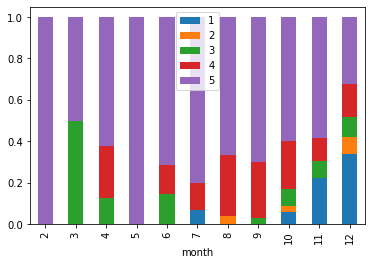

In [83]:
review_by_date.set_index("month").plot(kind="bar", stacked=True, mark_right = True)


In [84]:
df_total = review_by_date[5] + review_by_date[4] + review_by_date[3] + review_by_date[1] + review_by_date[1] 
df_rel = review_by_date[review_by_date.columns[1:]].div(df_total, 0)*100


In [85]:
df_rel

,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,100.000000
1,0.000000,0.000000,50.000000,0.000000,50.000000
2,0.000000,0.000000,12.500000,25.000000,62.500000
3,0.000000,0.000000,0.000000,0.000000,100.000000
4,0.000000,0.000000,14.285714,14.285714,71.428571
5,6.250000,0.000000,0.000000,12.500000,75.000000
6,0.000000,3.846154,0.000000,30.769231,69.230769
7,0.000000,0.000000,2.702703,27.027027,70.270270
8,5.555556,2.777778,8.333333,22.222222,58.333333
9,18.181818,0.000000,6.818182,9.090909,47.727273


In [103]:
def draw_review_breakdown(seller_id):
    reviews = merged_reviews[merged_reviews.seller_id==seller_id].sort_values(['order_purchase_timestamp'], ascending=False)
    reviews["month"] = reviews["order_purchase_timestamp"].map(lambda x: x.date().month)
    df_input = []
    result = {k: {1: 0, 2: 0, 3:0, 4:0, 5:0} for k in range(1,13)}
    flattened = reviews.groupby(["month", "review_score"]).order_id.count()
    for index, item in flattened.iteritems():
        result[index[0]][index[1]] = item

    for month, value in result.items():
        total = sum(value.values())
        if total > 0:
            new_value = {k: v/total for k, v in value.items()}
        else:
            new_value = value
        df_input.append({"month": month, **new_value})
    

    review_by_date = pd.DataFrame(df_input)
    ax = review_by_date.set_index("month").plot(figsize=(12,6), kind="bar", stacked=True, mark_right = True, rot=0, color=["#ab351d", "#f7bc1c", "#a3a9d8", "#e7e9f5", "#d9fff3"])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='upper left')
    ax.set_title("Sales in 2017")
    return review_by_date
    

,month,1,2,3,4,5
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0.000000,0.000000,0.000000,0.000000,1.000000
2,3,0.000000,0.000000,0.500000,0.000000,0.500000
3,4,0.000000,0.000000,0.125000,0.250000,0.625000
4,5,0.000000,0.000000,0.000000,0.000000,1.000000
5,6,0.000000,0.000000,0.142857,0.142857,0.714286
6,7,0.066667,0.000000,0.000000,0.133333,0.800000
7,8,0.000000,0.037037,0.000000,0.296296,0.666667
8,9,0.000000,0.000000,0.027027,0.270270,0.702703
9,10,0.057143,0.028571,0.085714,0.228571,0.600000


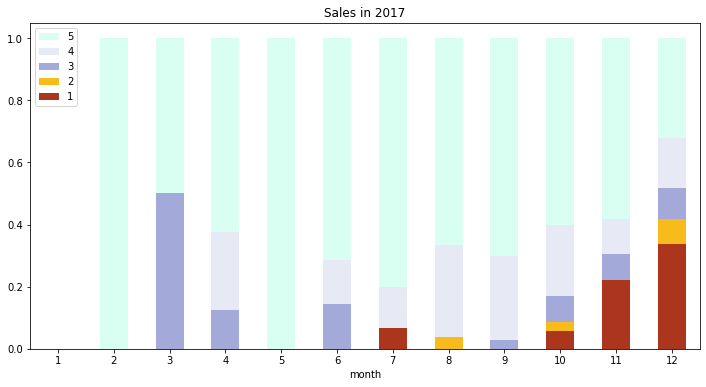

In [104]:
draw_review_breakdown("7aa4334be125fcdd2ba64b3180029f14")

,month,1,2,3,4,5
0,1,0.500000,0.000000,0.000000,0.000000,0.500000
1,2,0.000000,0.125000,0.250000,0.500000,0.125000
2,3,0.170213,0.042553,0.127660,0.170213,0.489362
3,4,0.033333,0.100000,0.066667,0.266667,0.533333
4,5,0.090909,0.000000,0.068182,0.227273,0.613636
5,6,0.069767,0.000000,0.000000,0.395349,0.534884
6,7,0.111111,0.037037,0.074074,0.222222,0.555556
7,8,0.222222,0.000000,0.166667,0.111111,0.500000
8,9,0.000000,0.000000,0.000000,0.000000,1.000000
9,10,0.000000,0.000000,0.000000,0.000000,0.000000


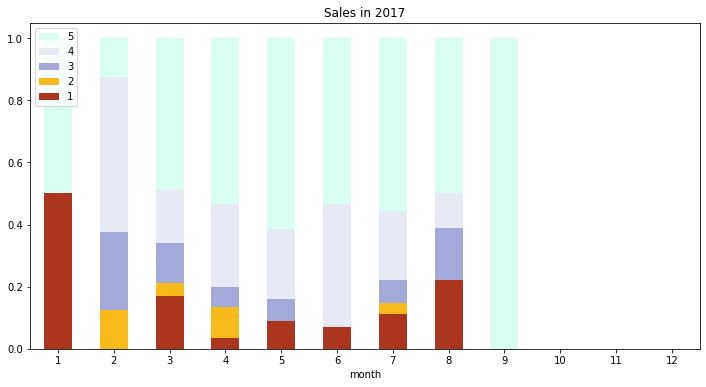

In [105]:
draw_review_breakdown("e26901d5ab434ce92fd9b5c256820a4e")

,month,1,2,3,4,5
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0.000000,0.200000,0.000000,0.200000,0.600000
4,5,0.000000,0.000000,0.000000,0.190476,0.809524
5,6,0.090909,0.045455,0.045455,0.363636,0.454545
6,7,0.076923,0.000000,0.000000,0.230769,0.692308
7,8,0.105263,0.052632,0.000000,0.263158,0.578947
8,9,0.000000,0.153846,0.038462,0.230769,0.576923
9,10,0.000000,0.000000,0.000000,0.125000,0.875000


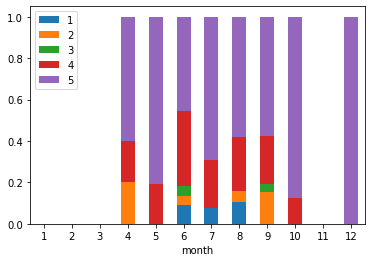

In [91]:
draw_review_breakdown("fc906263ca5083d09dce42fe02247800")

,month,1,2,3,4,5
0,1,0.222222,0.000000,0.111111,0.111111,0.555556
1,2,0.035714,0.035714,0.071429,0.178571,0.678571
2,3,0.285714,0.000000,0.000000,0.000000,0.714286
3,4,0.000000,0.000000,0.100000,0.400000,0.500000
4,5,0.125000,0.250000,0.166667,0.333333,0.125000
5,6,0.000000,0.111111,0.222222,0.222222,0.444444
6,7,0.100000,0.000000,0.100000,0.400000,0.400000
7,8,0.000000,0.000000,0.000000,0.000000,0.000000
8,9,0.000000,0.000000,0.000000,0.000000,0.000000
9,10,0.500000,0.000000,0.000000,0.500000,0.000000


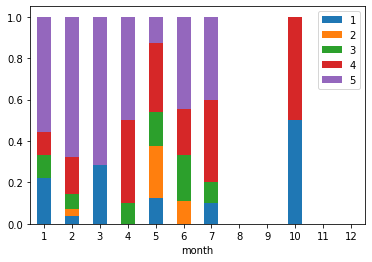

In [92]:
draw_review_breakdown("f4aba7c0bca51484c30ab7bdc34bcdd1")

In [194]:
def draw_review_breakdown_by_month():
    reviews = merged_reviews.sort_values(['order_purchase_timestamp'], ascending=False)
    reviews["month"] = reviews["order_purchase_timestamp"].map(lambda x: x.date().month)
    df_input = []
    result = {k: {1: 0, 2: 0, 3:0, 4:0, 5:0} for k in range(1,13)}
    flattened = reviews.groupby(["month", "review_score"]).order_id.count()
    for index, item in flattened.iteritems():
        result[index[0]][index[1]] = item

    for month, value in result.items():
        df_input.append({"month": month, **value})

    review_by_date = pd.DataFrame(df_input)
    review_by_date.set_index("month").plot(kind="bar", stacked=True, mark_right = True, rot=0)
    return review_by_date

,month,1,2,3,4,5
0,1,1331,352,843,1670,5033
1,2,1754,396,937,1763,4887
2,3,2080,429,1055,2114,5607
3,4,1270,432,876,2107,5995
4,5,1309,346,1019,2360,7083
5,6,1094,348,818,1968,6475
6,7,1145,363,899,2125,7148
7,8,1126,387,868,2350,7483
8,9,536,153,374,942,2868
9,10,767,165,493,1126,3186


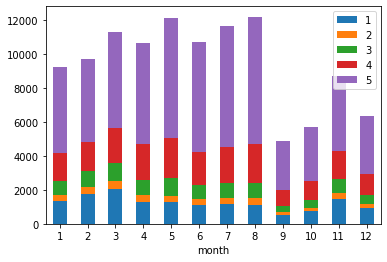

In [195]:
draw_review_breakdown_by_month()

In [198]:
merged_reviews["bad_reviews"] = np.where(merged_reviews['review_score']<3, 1, 0)

In [200]:
merged_reviews["missed_estimate"] = np.where(merged_reviews["order_estimated_delivery_date"] < merged_reviews["order_delivered_customer_date"], 1, 0)

In [204]:
merged_reviews["month"] = merged_reviews["order_purchase_timestamp"].map(lambda x: x.date().month)

<AxesSubplot:xlabel='month'>

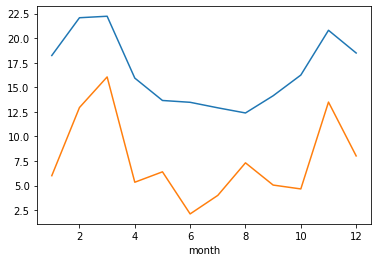

In [217]:
plt.figure()
(merged_reviews.groupby("month").bad_reviews.sum().div(merged_reviews.groupby("month").order_id.count()) * 100).plot()
(merged_reviews.groupby("month").missed_estimate.sum().div(merged_reviews.groupby("month").order_id.count()) * 100).plot()

In [591]:
bad_reviews_pct = merged_reviews.groupby("month").bad_reviews.sum().div(merged_reviews.groupby("month").order_id.count()) * 100
missed_estimate_pct = merged_reviews.groupby("month").missed_estimate.sum().div(merged_reviews.groupby("month").order_id.count()) * 100

In [592]:
combined = pd.concat([bad_reviews_pct, missed_estimate_pct], axis=1)

In [593]:
combined.columns = ["Bad reviews", "Missed estimate"]

0.7106835631720831 11.305289087441658


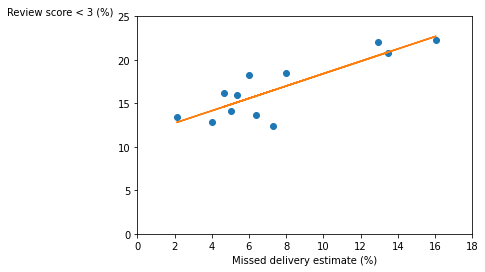

In [602]:
x = combined["Missed estimate"]
y = combined["Bad reviews"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.xlim(0, 18)
plt.ylim(0,25)
plt.xlabel("Missed delivery estimate (%)")
plt.ylabel("Review score < 3 (%)", rotation=0, loc="top")
print(m, b)

1.4272767457843318 -1.3214668390351125


Text(0, 1, 'Review score < 3 (%)')

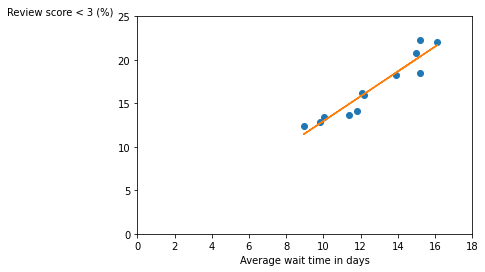

In [601]:
merged_reviews["wait_time"] = (merged_reviews.order_delivered_customer_date - merged_reviews.order_purchase_timestamp)
merged_reviews["wait_time_days"] = merged_reviews["wait_time"].round("d").map(lambda x: x.days)
wait_time_days = merged_reviews.groupby("month").wait_time_days.mean()
combined2 = pd.concat([bad_reviews_pct, wait_time_days], axis=1)
combined2.columns = ["Bad reviews", "Wait time in days"]
x = combined2["Wait time in days"]
y = combined2["Bad reviews"]
m, b = np.polyfit(x, y, 1)
print(m, b)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.xlim(0, 18)
plt.ylim(0,25)
plt.xlabel("Average wait time in days")
plt.ylabel("Review score < 3 (%)", rotation=0, loc="top")

In [307]:
import matplotlib.ticker as ticker

def draw_review_breakdown_by_year():
    reviews = merged_reviews.sort_values(['order_purchase_timestamp'], ascending=False)
    reviews["year"] = reviews["order_purchase_timestamp"].map(lambda x: x.date().year)
    reviews["month"] = reviews["order_purchase_timestamp"].map(lambda x: x.date().month)

    df_input = []
    result = {2016: {m: {1: 0, 2: 0, 3:0, 4:0, 5:0} for m in range(9, 13)}, 2017: {m: {1: 0, 2: 0, 3:0, 4:0, 5:0} for m in range(1, 13)}, 2018: {m: {1: 0, 2: 0, 3:0, 4:0, 5:0} for m in range(1, 10)}}
    flattened = reviews.groupby(["year", "month", "review_score"]).order_id.count()
    for index, item in flattened.iteritems():
        result[index[0]][index[1]][index[2]] = item
    for year, value in result.items():
        for month, new_value in value.items():
            new_value_tot = sum(new_value.values())
            if new_value_tot > 0:
                new_value_pct = {k: v * 100/new_value_tot for k, v in new_value.items()}
            else:
                new_value_pct = new_value
            df_input.append({"year": year, "month": month, **new_value_pct})
        
    review_by_date = pd.DataFrame(df_input)
    review_by_date["day"] = 1
    review_by_date["date"] = pd.to_datetime(review_by_date[["year", "month", "day"]])
    review_by_date.set_index("date", inplace=True)
    review_by_date.drop(["year", "month", "day"], axis=1, inplace=True)
    ax = review_by_date.plot(kind="bar", stacked=True, mark_right = True, rot=0, figsize=(20,5))
    
    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(review_by_date.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::1] = [item.strftime('%b %d') for item in review_by_date.index[::1]]
    # Every 12th ticklabel includes the year
    ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in review_by_date.index[::12]]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.gcf().autofmt_xdate()

    plt.show()
    return review_by_date

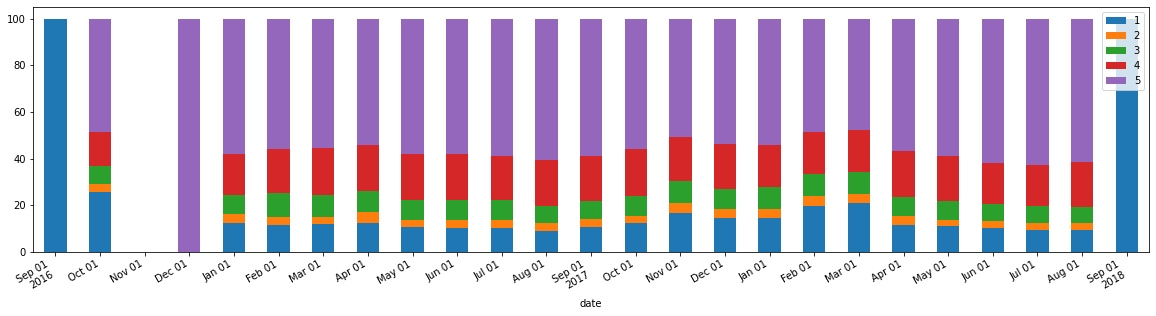

,1,2,3,4,5
date,,,,,
2016-09-01,100.000000,0.000000,0.000000,0.000000,0.000000
2016-10-01,25.815217,3.260870,7.608696,14.945652,48.369565
2016-11-01,0.000000,0.000000,0.000000,0.000000,0.000000
2016-12-01,0.000000,0.000000,0.000000,0.000000,100.000000
2017-01-01,12.422360,3.623188,8.385093,17.391304,58.178054
2017-02-01,11.569827,3.567788,9.938838,18.858308,56.065240
2017-03-01,11.887417,3.013245,9.536424,20.165563,55.397351
2017-04-01,12.402525,4.715930,8.949127,19.606387,54.326030
2017-05-01,10.497370,2.989000,8.632233,19.942611,57.938785


In [308]:
draw_review_breakdown_by_year()

<AxesSubplot:xlabel='year,month'>

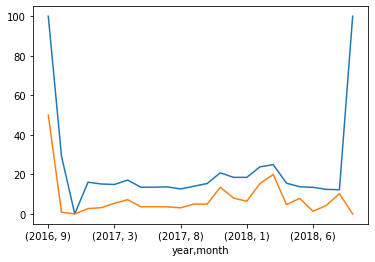

In [309]:
merged_reviews["year"] = merged_reviews["order_purchase_timestamp"].map(lambda x: x.date().year)
plt.figure()
(merged_reviews.groupby(["year", "month"]).bad_reviews.sum().div(merged_reviews.groupby(["year", "month"]).order_id.count()) * 100).plot()
(merged_reviews.groupby(["year", "month"]).missed_estimate.sum().div(merged_reviews.groupby(["year", "month"]).order_id.count()) * 100).plot()

In [356]:
test = merged_reviews[["seller_id","order_delivered_customer_date", "order_estimated_delivery_date", "review_creation_date"]]

In [357]:
test = test.dropna()

In [358]:
test["is_ceiling"] = test.review_creation_date == test.order_delivered_customer_date.map(lambda x: x.ceil("D"))

In [359]:
test["is_floor"] = test.review_creation_date == test.order_delivered_customer_date.map(lambda x: x.floor("D"))

In [360]:
test[(~(test.is_ceiling | test.is_floor)) & (test.order_delivered_customer_date < test.review_creation_date)]

,seller_id,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date,is_ceiling,is_floor
44,289cdb325fb7e7f891c38608bf9e0962,2018-07-27 16:46:38,2018-08-06,2018-08-01 00:00:00,False,False
240,16090f2ca825584b5a147ab24aa30c86,2017-02-22 16:58:39,2017-03-13,2017-02-24 00:00:00,False,False
311,001cca7ae9ae17fb1caed9dfb1094831,2017-04-04 16:59:58,2017-04-18,2017-04-06 00:00:00,False,False
381,87142160b41353c4e5fca2360caf6f92,2017-05-18 17:08:56,2017-06-02,2017-05-20 00:00:00,False,False
383,87142160b41353c4e5fca2360caf6f92,2017-06-26 20:19:40,2017-07-07,2017-07-08 00:00:00,False,False
...,...,...,...,...,...,...
113240,a3a38f4affed601eb87a97788c949667,2017-04-04 17:22:35,2017-04-20,2017-04-06 00:00:00,False,False
113248,6750d71153f00fc58829af2a8ef1bcf1,2017-06-22 16:04:05,2017-07-11,2017-06-25 00:00:00,False,False
113287,0c8380b62e38e8a1e6adbeba7eb9688c,2017-04-06 18:38:06,2017-04-11,2017-04-08 00:00:00,False,False
113303,f3862c2188522d89860c38a3ea8b550d,2018-05-21 14:31:41,2018-05-29,2018-06-01 00:00:00,False,False


In [361]:
test[(~(test.is_ceiling | test.is_floor)) & (test.order_delivered_customer_date > test.review_creation_date)]

,seller_id,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date,is_ceiling,is_floor
13,ef0ace09169ac090589d85746e3e036f,2018-06-18 20:34:58,2018-06-07,2018-06-09 00:00:00,False,False
32,ef0ace09169ac090589d85746e3e036f,2018-06-29 17:03:25,2018-05-11,2018-05-16 00:00:00,False,False
33,058fd0aa2bfdb2274e05e1ae971dabb6,2017-09-18 18:24:48,2017-08-25,2017-08-30 00:00:00,False,False
47,ef0ace09169ac090589d85746e3e036f,2018-06-07 19:52:40,2018-06-04,2018-06-06 00:00:00,False,False
83,ef0ace09169ac090589d85746e3e036f,2018-06-01 20:56:18,2018-04-03,2018-04-05 00:00:00,False,False
...,...,...,...,...,...,...
113256,977f9f63dd360c2a32ece2f93ad6d306,2017-10-19 00:08:00,2017-10-11,2017-10-13 00:00:00,False,False
113263,dd2bdf855a9172734fbc3744021ae9b9,2018-02-25 14:54:29,2018-01-30,2018-02-02 00:00:00,False,False
113284,edf3fabebcc20f7463cc9c53da932ea8,2018-06-12 23:11:29,2018-06-08,2018-06-10 00:00:00,False,False
113289,db4350fd57ae30082dec7acbaacc17f9,2018-03-18 20:08:50,2018-03-02,2018-03-07 00:00:00,False,False


In [364]:
test[((test.is_ceiling | test.is_floor)) & (test.order_delivered_customer_date > test.review_creation_date)]

,seller_id,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date,is_ceiling,is_floor
67,058fd0aa2bfdb2274e05e1ae971dabb6,2017-12-14 02:33:23,2017-12-21,2017-12-14 00:00:00,False,True
81,ef0ace09169ac090589d85746e3e036f,2018-01-13 00:21:58,2018-01-31,2018-01-13 00:00:00,False,True
87,ef0ace09169ac090589d85746e3e036f,2018-05-11 00:34:48,2018-05-30,2018-05-11 00:00:00,False,True
99,ef0ace09169ac090589d85746e3e036f,2018-04-18 01:52:31,2018-04-23,2018-04-18 00:00:00,False,True
122,2c9e548be18521d1c43cde1c582c6de8,2018-04-12 00:24:45,2018-04-25,2018-04-12 00:00:00,False,True
...,...,...,...,...,...,...
113206,276677b5d08786d5dce7c2149dcce48b,2018-04-03 00:48:33,2018-04-12,2018-04-03 00:00:00,False,True
113208,17f51e7198701186712e53a39c564617,2017-10-07 13:23:08,2017-10-05,2017-10-07 00:00:00,False,True
113224,1bb2bdb95f4841f1bba2c0d2cd83d3c9,2018-08-16 05:22:18,2018-08-16,2018-08-16 00:00:00,False,True
113235,aba1721a889e04decc910aa13b768ef4,2018-08-23 23:04:52,2018-08-21,2018-08-23 00:00:00,False,True


In [367]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110847 entries, 0 to 113321
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   seller_id                      110847 non-null  object        
 1   order_delivered_customer_date  110847 non-null  datetime64[ns]
 2   order_estimated_delivery_date  110847 non-null  datetime64[ns]
 3   review_creation_date           110847 non-null  object        
 4   is_ceiling                     110847 non-null  bool          
 5   is_floor                       110847 non-null  bool          
dtypes: bool(2), datetime64[ns](2), object(2)
memory usage: 4.4+ MB


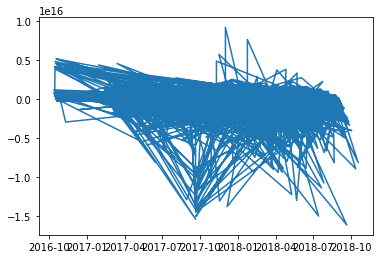

In [373]:
plt.plot(test.order_delivered_customer_date, pd.to_datetime(test.review_creation_date)-test.order_delivered_customer_date)

In [374]:
merged_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,bad_reviews,missed_estimate,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0,0,10,2017
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,0,0,8,2017
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,0,0,8,2017
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,...,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,0,0,10,2017
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,0,0,7,2018


In [375]:
products = pd.read_csv("data/olist_products_dataset.csv")
merged_products = pd.merge(left=merged_reviews, right=products, left_on="product_id", right_on="product_id")

In [376]:
merged_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,month,year,product_category_name_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,10,2017,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,8,2017,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,8,2017,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,...,10,2017,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,7,2018,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [379]:
merged_products["volume"] = merged_products.product_length_cm_y * merged_products.product_height_cm_y * merged_products.product_width_cm_y

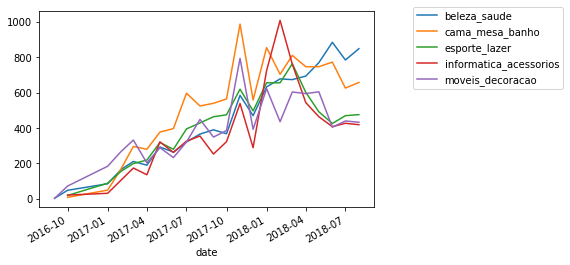

In [423]:
df = merged_products.groupby(["year", "month", "product_category_name_y"]).order_id.count()
# reset_index() gives a column for counting, after groupby uses year and category
ctdf = (merged_products.reset_index()
          .groupby(['year',
                    'month', 'product_category_name_y'], as_index=False).order_id
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )
ctdf["day"] = 1
ctdf["date"] = pd.to_datetime(ctdf[["year", "month", "day"]])

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('product_category_name_y'):
    if data.order_id.max() > 700:
        data.plot(x='date', y='order_id', ax=ax, label=key)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [407]:
missed_estimate_pct = merged_reviews.groupby(["year", "month"]).missed_estimate.sum().div(merged_reviews.groupby(["year","month"]).order_id.count()) * 100

In [432]:
merged_products.groupby("product_category_name_y").volume.mean().sort_values(ascending=False).head(30)

product_category_name_y
moveis_escritorio                                 74000.974721
moveis_colchao_e_estofado                         69557.710526
moveis_cozinha_area_de_servico_jantar_e_jardim    52211.719858
moveis_quarto                                     48283.100000
eletrodomesticos_2                                47541.966805
moveis_sala                                       42613.863905
industria_comercio_e_negocios                     41933.286245
pcs                                               41926.640394
malas_acessorios                                  39505.455128
portateis_casa_forno_e_cafe                       39317.210526
sinalizacao_e_seguranca                           31043.929648
casa_conforto_2                                   30789.666667
la_cuisine                                        28224.928571
bebes                                             27138.154948
casa_conforto                                     26470.743707
climatizacao                   

In [434]:
payments = pd.read_csv("data/olist_order_payments_dataset.csv")

In [435]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [436]:
merged_payments = pd.merge(left=merged_products, right=payments, left_on="order_id", right_on="order_id")

In [438]:
merged_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y,volume,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,1976.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,1976.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,1976.0,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,1976.0,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,1976.0,1,credit_card,1,37.77


In [442]:
ctdf = (merged_payments.reset_index()
          .groupby(['year',
                    'month', 'payment_type'], as_index=False).order_id
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )
ctdf["day"] = 1
ctdf["date"] = pd.to_datetime(ctdf[["year", "month", "day"]])

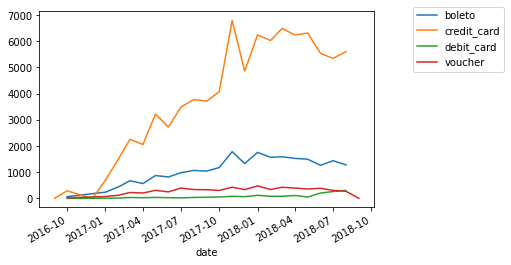

In [443]:
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('payment_type'):
    data.plot(x='date', y='order_id', ax=ax, label=key)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [445]:
reviews.dropna()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
date,,,,,,,
2018-05-01,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47
2018-05-01,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01
2018-08-01,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37
2018-07-01,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10,2018-07-11 14:10:25
2018-06-01,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
2018-05-01,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\r\n\r\nExcelente atendimento,b...",2018-05-22,2018-05-23 00:51:43
2018-07-01,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04,2018-07-05 00:25:13
2018-07-01,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30,2018-07-02 23:09:35


In [448]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud ... done


In [454]:
import wordcloud

In [463]:
text = " ".join(review for review in reviews.dropna().review_comment_message)
wc = wordcloud.WordCloud(stopwords=stopwords).generate(text)

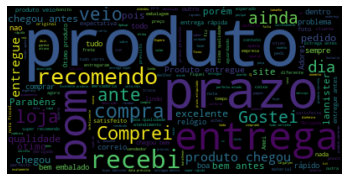

In [464]:
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [461]:
stopwords = []
with open("stopwords.txt") as input_file:
    for line in input_file:
        stopwords.append(line.strip())

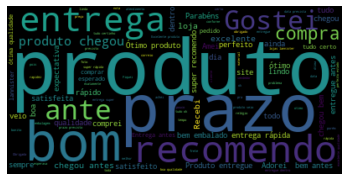

In [467]:
text = " ".join(review for review in reviews[reviews.review_score>3].dropna().review_comment_message)
wc = wordcloud.WordCloud(stopwords=stopwords,max_words=100).generate(text)
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

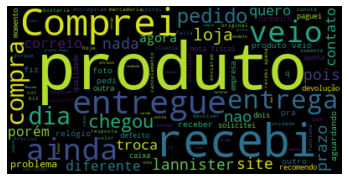

In [468]:
text = " ".join(review for review in reviews[reviews.review_score<3].dropna().review_comment_message)
wc = wordcloud.WordCloud(stopwords=stopwords,max_words=100).generate(text)
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [494]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
date,,,,,,,
2018-01-01,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
2018-03-01,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2018-02-01,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
2017-04-01,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
2018-03-01,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [495]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [496]:
order_reviews = pd.merge(left=reviews, right=orders, left_on="order_id", right_on="order_id")

In [497]:
order_reviews["wait_time"] = order_reviews.order_delivered_customer_date - order_reviews.order_purchase_timestamp

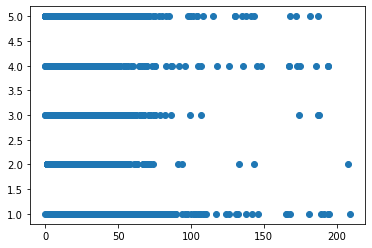

In [498]:
plt.plot(order_reviews["wait_time"].map(lambda x: x.days), order_reviews.review_score,"o")

In [499]:
from datetime import timedelta
order_reviews[order_reviews.wait_time > timedelta(days=200)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait_time
705,ae83a790a3f01e1c43dd4d2863cebe0c,1b3190b2dfa9d789e1f14c05b647a14a,2,NaN,NaN,2018-03-17,2018-03-17 05:08:11,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208 days 08:26:32
57862,5e7a3ac257327b889989c9ede7d35ff7,ca07593549f1816d26a572e06dc1eab6,1,NaN,"uma falta de respeito com o consumidor , estou...",2017-03-25,2017-03-26 22:57:21,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,209 days 15:05:12


In [500]:
order_reviews["delta_estimate"] = order_reviews.order_estimated_delivery_date - order_reviews.order_delivered_customer_date

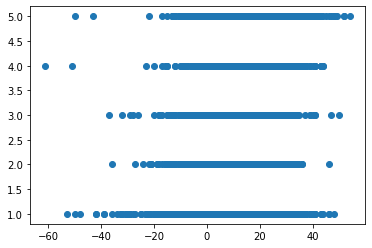

In [543]:
plt.plot(order_reviews["delta_estimate"].map(lambda x: x.days), order_reviews.review_score,"o")
order_reviews["delta_days"] = order_reviews["delta_estimate"].map(lambda x: x.days)

In [545]:
order_reviews = order_reviews.dropna()

<AxesSubplot:xlabel='delta_days'>

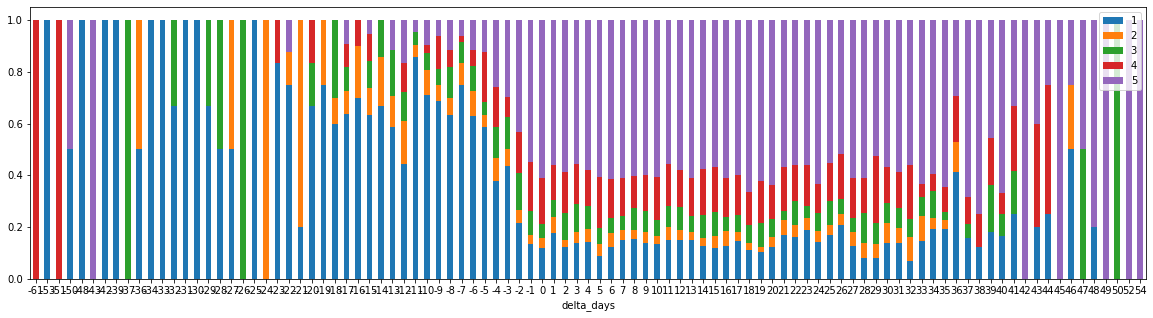

In [568]:
temp_df = order_reviews.groupby(["delta_days", "review_score"]).order_id.count()
result = {}
for index, row in temp_df.iteritems():
    if index[0] not in result:
        result[index[0]] = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    result[index[0]][index[1]] = row

result_df = []
for key, value in result.items():
    total = sum(value.values())
    if total > 0:
        new_value = {k: v/ total for k, v in value.items()}
    result_df.append({"delta_days": key, **new_value})
result_df = pd.DataFrame(result_df)
result_df.set_index("delta_days", inplace=True)
result_df.plot(kind="bar", stacked=True,figsize=(20,5), rot=0 )

<AxesSubplot:xlabel='wait_time_days'>

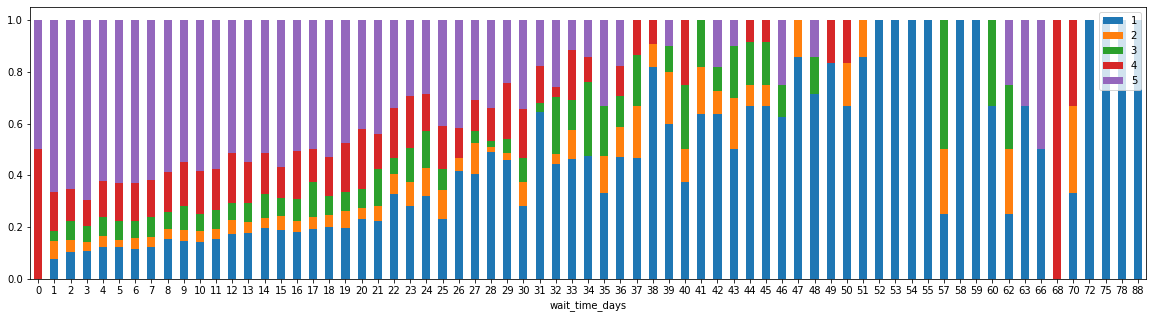

In [571]:
order_reviews["wait_time_days"] = order_reviews["wait_time"].map(lambda x: x.days)

temp_df = order_reviews.groupby(["wait_time_days", "review_score"]).order_id.count()
result = {}
for index, row in temp_df.iteritems():
    if index[0] not in result:
        result[index[0]] = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    result[index[0]][index[1]] = row

result_df = []
for key, value in result.items():
    total = sum(value.values())
    if total > 0:
        new_value = {k: v/ total for k, v in value.items()}
    result_df.append({"wait_time_days": key, **new_value})
result_df = pd.DataFrame(result_df)
result_df.set_index("wait_time_days", inplace=True)
result_df.plot(kind="bar", stacked=True,figsize=(20,5), rot=0 )

In [502]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [526]:
order_reviews = order_reviews.dropna()
X = np.array(order_reviews["delta_estimate"].map(lambda x: x.days)).reshape(-1, 1)
y = np.array(order_reviews["review_score"])



In [527]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [538]:
logistic_regression= LogisticRegression(multi_class="multinomial")
logistic_regression.fit(X_train ,y_train)
y_pred=logistic_regression.predict_proba(X_test)

In [542]:
logistic_regression.summary

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [533]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 12.3 MB/s eta 0:00:01


In [536]:
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(y_train,
                        X_train,
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

ModuleNotFoundError: No module named 'statsmodels.miscmodels.ordinal_model'

In [605]:
order_items = pd.read_csv("data/olist_order_items_dataset.csv")

In [608]:
order_items.size

788550

In [615]:
orders = pd.read_csv("data/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"])

In [616]:
orders.size

795528

In [617]:
orders_items = pd.merge(left=order_items, right=orders, left_on="order_id", right_on="order_id")


In [618]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


<AxesSubplot:xlabel='year,month'>

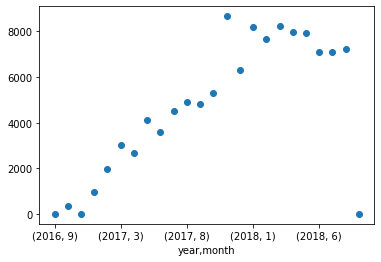

In [626]:
orders_items["year"] = orders_items['order_purchase_timestamp'].map(lambda x: x.date().year)
orders_items["month"] = orders_items['order_purchase_timestamp'].map(lambda x: x.date().month)
orders_items.groupby(["year", "month"]).order_id.count().plot(style="o")

In [627]:
orders_items["wait_time"] = (merged_reviews.order_delivered_customer_date - merged_reviews.order_purchase_timestamp)
orders_items["wait_time_days"] = merged_reviews["wait_time"].round("d").map(lambda x: x.days)

<AxesSubplot:xlabel='year,month'>

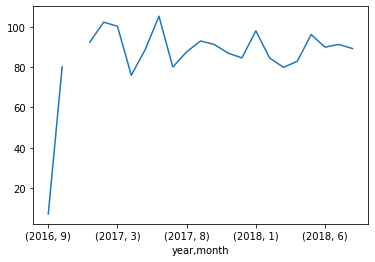

In [631]:
orders_items.groupby(["year", "month"]).wait_time_days.var().plot()

In [632]:
orders_items_products = pd.merge(left=orders_items, right=products, left_on="product_id", right_on="product_id")

In [633]:
orders_items_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,wait_time,wait_time_days,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,8 days 10:28:40,8.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,1 days 09:09:41,1.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,5 days 01:56:14,5.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,11 days 19:15:39,12.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,11 days 01:31:28,11.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


<AxesSubplot:xlabel='product_category_name'>

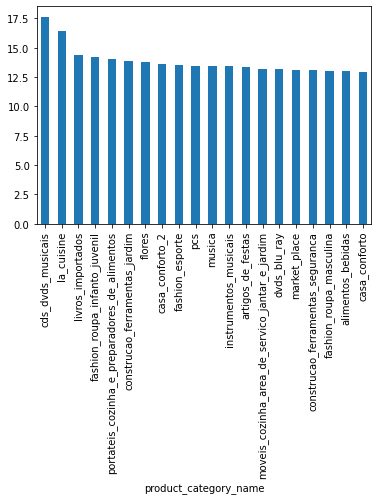

In [655]:
orders_items_products.groupby("product_category_name").wait_time_days.mean().sort_values(ascending=False).head(20).plot(kind="bar")

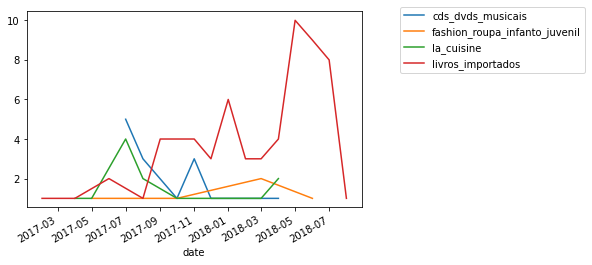

In [656]:
filtered_df = orders_items_products[(orders_items_products.product_category_name == "cds_dvds_musicais") |  (orders_items_products.product_category_name == "la_cuisine") | (orders_items_products.product_category_name == "livros_importados") | (orders_items_products.product_category_name == "fashion_roupa_infanto_juvenil") ]


df = filtered_df.groupby(["year", "month", "product_category_name"]).order_id.count()
# reset_index() gives a column for counting, after groupby uses year and category
ctdf = (filtered_df.reset_index()
          .groupby(['year',
                    'month', 'product_category_name'], as_index=False).order_id
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )
ctdf["day"] = 1
ctdf["date"] = pd.to_datetime(ctdf[["year", "month", "day"]])

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('product_category_name'):
        data.plot(x='date', y='order_id', ax=ax, label=key)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [657]:
orders_items["f_over_p"] = orders_items.freight_value / orders_items.price

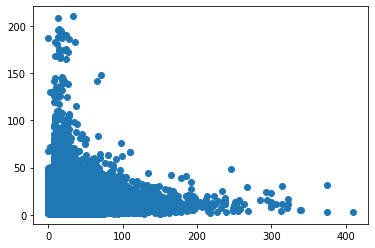

In [661]:
plt.plot(orders_items["freight_value"], orders_items.wait_time_days, "o")

In [663]:
orders_items.groupby("seller_id").agg({"order_id": count})

NameError: name 'count' is not defined

In [666]:
merge_df = pd.merge(left=orders_items, right=reviews, left_on="order_id", right_on="order_id")

In [672]:
result = merge_df.groupby("seller_id").agg({"review_score": "mean", "order_id": "count"})

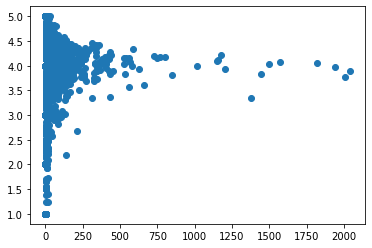

In [675]:
plt.plot(result["order_id"], result["review_score"], "o")

In [678]:
merge_df.groupby("seller_id").agg({"review_score": "mean"}).var()

review_score    0.956999
dtype: float64

In [679]:
merge_df.groupby("seller_id").agg({"review_score": "mean"}).mean()

review_score    3.956893
dtype: float64